# Assignment 2: Build a CNN for image recognition.

## Due Date:  March 27, 11:59PM

### Name: Atul Gupta


## Introduction:

1. In this assignment, you will build Convolutional Neural Network to classify CIFAR-10 Images.
2. You can directly load dataset from many deep learning packages.
3. You can use any deep learning packages such as pytorch, keras or tensorflow for this assignment.

## Requirements:

1. You need to load cifar 10 data and split the entire training dataset into training and validation.
2. You will implement a CNN model to classify cifar 10 images with provided structure.
3. You need to plot the training and validation accuracy or loss obtained from above step.
4. Then you can use tuned parameters to train using the entire training dataset.
5. You should report the testing accuracy using the model with complete data.
6. You may try to change the structure (e.g, add BN layer or dropout layer,...) and analyze your findings.

## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

## Batch Normalization (BN)

### Background:

- Batch Normalization is a technique to speed up training and help make the model more stable.
- In simple words, batch normalization is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

- For more detailed information, you may refer to the original paper: https://arxiv.org/pdf/1502.03167.pdf.

### BN Algorithm:

- Input: Values of $x$ over a mini-batch: $\mathbf{B}$ = $\{x_1,..., x_m\};$
- Output: $\{y_i = BN_{\gamma,\beta}(x_i)\}$, $\gamma, \beta$ are learnable parameters

Normalization of the Input:
$$\mu_{\mathbf{B}} = \frac{1}{m}\sum_{i=1}^m x_i$$
$$\sigma_{\mathbf{B}}^2 = \frac{1}{m}\sum_{i=1}^m (x_i - \mu_{\mathbf{B}})^2$$
$$\hat{x_i} = \frac{x_i - \mu_{\mathbf{B}}}{\sqrt{\sigma_{\mathbf{B}}}^2 + \epsilon}$$
Re-scaling and Offsetting:
$$y_i = \gamma \hat{x_i} + \beta = BN_{\gamma,\beta}(x_i)$$


### Advantages of BN:
1. Improves gradient flow through the network.
2. Allows use of saturating nonlinearities and higher learning rates.
3. Makes weights easier to initialize.
4. Act as a form of regularization and may reduce the need for dropout.

### Implementation:

- The batch normalization layer has already been implemented in many packages. You may simply call the function to build the layer. For example: torch.nn.BatchNorm2d() using pytroch package, keras.layers.BatchNormalization() using keras package.
- The location of BN layer: Please make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

## 1. Data preparation

### 1.1. Load data


In [1]:
# Load Cifar-10 Data
# This is just an example, you may load dataset from other packages.
import keras
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models,layers

### If you can not load keras dataset, un-comment these two lines.
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

2024-03-28 14:05:24.903524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


In [2]:
y_train.dtype

dtype('uint8')

### 1.2. One-hot encode the labels (5 points)

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Implement a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    encoded = np.zeros(shape=(y.shape[0],num_class))
    encoded[np.arange(y.shape[0]),y.ravel()] = 1
    return encoded
        

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets (5 points)

Randomly partition the 50K training samples to 2 sets: 
* a training set containing 40K samples: x_tr, y_tr
* a validation set containing 10K samples: x_val, y_val


In [4]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train_vec,test_size=0.2,random_state=43)


print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters (50 points)

- Build a convolutional neural network model using the below structure:

- It should have a structure of: Conv - ReLU - Max Pool - ConV - ReLU - Max Pool - Dense - ReLU - Dense - Softmax

- In the graph 3@32x32 means the dimension of input image, 32@30x30 means it has 32 filters and the dimension now becomes 30x30 after the convolution.
- All convolutional layers (Conv) should have stride = 1 and no padding.
- Max Pooling has a pool size of 2 by 2.




<img src="network.PNG"/>

- You may use the validation data to tune the hyper-parameters (e.g., learning rate, and optimization algorithm)
- Do NOT use test data for hyper-parameter tuning!!!
- Try to achieve a validation accuracy as high as possible.

In [5]:
# Build the model

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (4, 4), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd', 'adagrad', 'adamax'])

    optimizer = {
      'adam':keras.optimizers.Adam(learning_rate=hp_learning_rate),
      'rmsprop': keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
      'sgd': keras.optimizers.SGD(learning_rate=hp_learning_rate),
      'adagrad': keras.optimizers.Adagrad(learning_rate=hp_learning_rate),
      'adamax': keras.optimizers.Adamax(learning_rate=hp_learning_rate)
    }[hp_optimizer]

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Define model optimizer and loss function
import keras_tuner as kt
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     directory='my_dir',
                     project_name='atul_assign2')

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

Reloading Tuner from my_dir/atul_assign2/tuner0.json


In [8]:
# Train the model and store model parameters/loss values
tuner.search(x_tr, y_tr, epochs=100, validation_data=(x_val, y_val), callbacks=[stop_early])

In [9]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [10]:
print("Best Optimizer:", best_hps.get('optimizer'))
print("Best Learning Rate:", best_hps.get('learning_rate'))

Best Optimizer: adamax
Best Learning Rate: 0.001


In [11]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_tr, y_tr, epochs=100, validation_data=(x_val, y_val), callbacks=[stop_early])

2024-03-28 14:05:30.436630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
1250/1250 [==============================] - 13s 10ms/step - loss: 2.6241 - accuracy: 0.2671 - val_loss: 1.7259 - val_accuracy: 0.3723
Epoch 2/100
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5630 - accuracy: 0.4458 - val_loss: 1.5386 - val_accuracy: 0.4629
Epoch 3/100
1250/1250 [==============================] - 13s 11ms/step - loss: 1.3347 - accuracy: 0.5304 - val_loss: 1.4010 - val_accuracy: 0.5145
Epoch 4/100
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1714 - accuracy: 0.5919 - val_loss: 1.2744 - val_accuracy: 0.5543
Epoch 5/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0270 - accuracy: 0.6432 - val_loss: 1.1496 - val_accuracy: 0.6013
Epoch 6/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.8905 - accuracy: 0.6903 - val_loss: 1.1631 - val_accuracy: 0.6115
Epoch 7/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.7608 - accuracy: 0.7378 - val_loss: 1

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [13]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 10


## 3. Plot the training and validation loss curve versus epochs. (5 points)

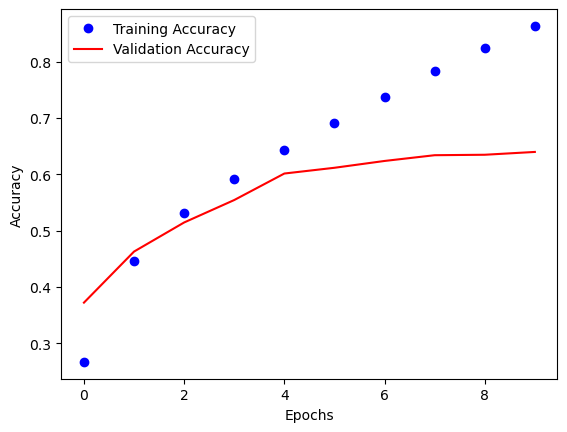

In [14]:
# Plot the loss curve
import matplotlib.pyplot as plt
%matplotlib inline

epochs = history.epoch
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 4. Train (again) and evaluate the model (5 points)

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [15]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
hypermodel = tuner.hypermodel.build(best_hps)

In [16]:
#<Train your model on the entire training set (50K samples)>
hypermodel.fit(x_train, y_train_vec, epochs=best_epoch)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.6431 - accuracy: 0.2999
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4714 - accuracy: 0.4774
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2446 - accuracy: 0.5611
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0518 - accuracy: 0.6363
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8994 - accuracy: 0.6884
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7544 - accuracy: 0.7407
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6271 - accuracy: 0.7847
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4992 - accuracy: 0.8293
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3894 - accuracy: 0.8656
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step

## 5. Evaluate the model on the test set (5 points)

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [17]:
# Evaluate your model performance (testing accuracy) on testing data.
eval_result = hypermodel.evaluate(x_test, y_test_vec)

313/313 [==============================] - 1s 4ms/step - loss: 1.3045 - accuracy: 0.6711


In [18]:
print('Test Accuracy:', eval_result[1])
print('Test Loss:', eval_result[0])

Test Accuracy: 0.6711000204086304
Test Loss: 1.3045134544372559


## 6. Building model with new structure (25 points)
- In this section, you can build your model with adding new layers (e.g, BN layer or dropout layer, ...)
- If you want to regularize a ```Conv/Dense layer```, you should place a ```Dropout layer``` before the ```Conv/Dense layer```.
- You can try to compare their loss curve and testing accuracy and analyze your findings.
- You need to try at lease two different structures.

In [19]:
new_model_one = models.Sequential()
new_model_one.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
new_model_one.add(layers.BatchNormalization())
new_model_one.add(layers.Activation('relu'))
new_model_one.add(layers.MaxPooling2D((2, 2)))

new_model_one.add(layers.Conv2D(64, (4, 4)))
new_model_one.add(layers.BatchNormalization())
new_model_one.add(layers.Activation('relu'))
new_model_one.add(layers.MaxPooling2D((2, 2)))

new_model_one.add(layers.Flatten())
new_model_one.add(layers.Dropout(0.5))
new_model_one.add(layers.Dense(256))
new_model_one.add(layers.BatchNormalization())
new_model_one.add(layers.Activation('relu'))
new_model_one.add(layers.Dense(10, activation='softmax'))

new_model_one.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
new_model_one.fit(x_train, y_train_vec, epochs=best_epoch)

eval_result_one = new_model_one.evaluate(x_test, y_test_vec)
print('Test Accuracy:', eval_result_one[1])
print('Test Loss:', eval_result_one[0])

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3307 - accuracy: 0.5259
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0326 - accuracy: 0.6377
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9114 - accuracy: 0.6775
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8352 - accuracy: 0.7043
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7750 - accuracy: 0.7278
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7285 - accuracy: 0.7450
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6844 - accuracy: 0.7589
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6447 - accuracy: 0.7735
Epoch 9/10
1563/1563 [==============================] - 2098s 1s/step - loss: 0.6123 - accuracy: 0.7856
Epoch 10/10
313/313 [==============================] - 2s 4ms/st

In [20]:
new_model_two = models.Sequential()
new_model_two.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
new_model_two.add(layers.BatchNormalization())
new_model_two.add(layers.Activation('relu'))
new_model_two.add(layers.MaxPooling2D((2, 2)))

new_model_two.add(layers.Conv2D(64, (4, 4)))
new_model_two.add(layers.BatchNormalization())
new_model_two.add(layers.Activation('relu'))
new_model_two.add(layers.MaxPooling2D((2, 2)))

new_model_two.add(layers.Conv2D(128, (4, 4)))
new_model_two.add(layers.BatchNormalization())
new_model_two.add(layers.Activation('relu'))
new_model_two.add(layers.MaxPooling2D((2, 2)))

new_model_two.add(layers.Flatten())
new_model_two.add(layers.Dropout(0.5))
new_model_two.add(layers.Dense(512))
new_model_two.add(layers.BatchNormalization())
new_model_two.add(layers.Activation('relu'))
new_model_two.add(layers.Dense(10, activation='sigmoid'))

new_model_two.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
new_model_two.fit(x_train, y_train_vec, epochs=best_epoch)

eval_result_two = new_model_two.evaluate(x_test, y_test_vec)
print('Test Accuracy:', eval_result_two[1])
print('Test Loss:', eval_result_two[0])

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5118 - accuracy: 0.4555
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2075 - accuracy: 0.5724
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0848 - accuracy: 0.6182
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0074 - accuracy: 0.6497
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9396 - accuracy: 0.6733
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8907 - accuracy: 0.6906
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8453 - accuracy: 0.7064
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8059 - accuracy: 0.7199
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7820 - accuracy: 0.7282
Epoch 10/10
313/313 [==============================] - 2s 5ms/st

In [21]:
print('Accuracy for the original model:', eval_result[1])
print('Accuracy for the first new model:', eval_result_one[1])
print('Accuracy for the second new model:', eval_result_two[1])

Accuracy for the original model: 0.6711000204086304
Accuracy for the first new model: 0.7427999973297119
Accuracy for the second new model: 0.6672000288963318
